In [3]:
import pandas as pd
import numpy as np
from datetime import date

def preprocess(import_data):
    pre_data = import_data

    #preprocess [IssueDateTime] label
    issue_date_time = import_data['IssueDateTime'].to_numpy()
    a = issue_date_time

    for i in range(issue_date_time.size):
        a_date = date.fromisoformat(a[i])
        issue_date_time[i] = a_date.month

    pre_data['IssueDateTime'] = issue_date_time

    #preprocess [ClassificationID] label
    classification_id = import_data['ClassificationID'].to_numpy()

    for i in range(classification_id.size):
        id_num = classification_id[i]
        convert = str(id_num)
        if len(convert) == 9:
            convert = '0' + convert
        first_two = convert[:2]
        id_num = int(first_two)
        classification_id[i] = id_num

    pre_data['ClassificationID'] = classification_id

    #preprocess [ID] label
    id_data = pre_data['ID'].to_numpy()
    b = id_data
    for i in range(id_data.size):
        id = id_data[i]
        id = (float)(id / 10000000)
        b[i] = id

    pre_data['ID'] = b

    #factorize
    categorical_list = ['ID','IssueDateTime', 'DeclarationOfficeID', 'ProcessType', 'TransactionNature', 'Type', 'PaymentType','BorderTransportMeans',
          'DeclarerID','ImporterID', 'SellerID', 'ExpressID', 'ClassificationID', 'ExportationCountry', 'OriginCountry', 'DutyRegime', 'DisplayIndicator']

    for i in range(len(categorical_list)):
        c_l = import_data[categorical_list[i]].to_numpy()
        codes, uniques = pd.factorize(c_l, sort = True)
        pre_data[categorical_list[i]] = codes
    return pre_data

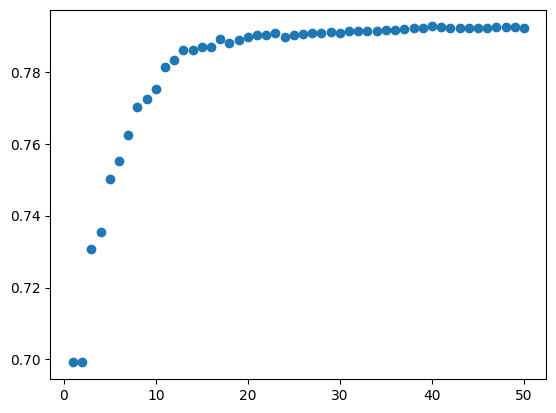

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

import_data = pd.read_csv('train.csv')
import_data.head()

pre_data = preprocess(import_data)
analyze_data = pre_data.astype('float')

data_input = analyze_data.drop(labels = 'Fake', axis = 1).to_numpy()
data_target = analyze_data['Fake'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data_input, data_target, random_state = 42)

score = []
index = []
for i in range(50):
    kn = KNeighborsClassifier(n_neighbors= i + 1, weights = 'distance')
    scores = cross_validate(kn, train_input, train_target, return_train_score = True, n_jobs = -1)

    kn.fit(train_input, train_target)
    index.append(i+1)
    score.append(kn.score(test_input, test_target))

plt.scatter(index, score)

In [6]:
# find the feature importance with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs = -1)
scores = cross_validate(rf, train_input, train_target, return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))
rf.fit(train_input, train_target)
print(rf.feature_importances_)

0.9999911691981632 0.7990815966089722
[0.04822137 0.05379736 0.04498852 0.00197093 0.02195395 0.01883452
 0.02648588 0.02018098 0.08846788 0.09220622 0.08663459 0.02311874
 0.06500522 0.0416295  0.04130315 0.03346183 0.02541549 0.03539557
 0.1142871  0.1166412 ]
